## Session 6 Homework

This homework will test our understanding of the other models taught in this session

In [13]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [1]:
FILE_PATH = "./housing.csv"
select_cols = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", 
               "median_income", "median_house_value", "ocean_proximity"]

In [4]:
df = pd.read_csv(FILE_PATH, usecols=select_cols)

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.sample(8)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
6684,-118.07,34.16,39.0,1804.0,265.0,730.0,276.0,6.4761,397500.0,INLAND
5214,-118.25,33.94,44.0,1463.0,312.0,940.0,312.0,2.3333,99800.0,<1H OCEAN
3114,-117.66,35.61,5.0,5735.0,932.0,2623.0,862.0,4.8494,87200.0,INLAND
19754,-122.19,40.20,30.0,2750.0,476.0,1296.0,464.0,3.5305,73600.0,INLAND
10210,-117.92,33.88,32.0,1632.0,244.0,575.0,235.0,5.3986,318700.0,<1H OCEAN
17478,-119.86,34.38,28.0,1062.0,309.0,1058.0,305.0,1.5071,316700.0,NEAR OCEAN
10418,-117.62,33.42,23.0,2656.0,515.0,998.0,435.0,4.0294,500001.0,NEAR OCEAN
13719,-117.18,34.07,14.0,1258.0,245.0,752.0,264.0,3.3924,97400.0,INLAND


In [7]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
df.total_bedrooms = df.total_bedrooms.fillna(0)

In [9]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [10]:
df.median_house_value = np.log1p(df.median_house_value)

In [11]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,13.022766,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,12.789687,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,12.771673,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,12.740520,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,12.743154,NEAR BAY


In [14]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [15]:
# sanity check
(len(df_train) / len(df)), (len(df_val) / len(df)), (len(df_val) / len(df))

(0.6, 0.2, 0.2)

In [16]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [17]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [18]:
# drop target column
df_train = df_train.drop('median_house_value', axis=1)
df_val = df_val.drop('median_house_value', axis=1)
df_test = df_test.drop('median_house_value', axis=1)

In [19]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-118.18,34.63,19.0,3562.0,606.0,1677.0,578.0,4.1573,INLAND
1,-116.90,34.69,10.0,337.0,102.0,108.0,50.0,0.4999,INLAND
2,-118.26,33.78,27.0,1672.0,491.0,1723.0,462.0,2.0458,NEAR OCEAN
3,-117.33,34.17,5.0,4718.0,1140.0,2564.0,1056.0,2.9877,INLAND
4,-119.02,35.35,42.0,1239.0,251.0,776.0,272.0,1.9830,INLAND


### Question 1

In [29]:
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')

In [30]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

In [23]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [28]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- ocean_proximity=INLAND <= 0.50
|   |--- value: [12.31]
|--- ocean_proximity=INLAND >  0.50
|   |--- value: [11.61]



C:\Users\USER\anaconda3\envs\keras_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


The answer is `ocean_proximity=INLAND <=0.50` 

### Question 2

In [33]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=1, random_state=1)

In [34]:
y_pred = rf.predict(X_val)

In [35]:
y_pred

array([12.69611943, 13.08974669, 11.37547351, ..., 12.74865454,
       12.32324285, 12.30347243])

In [37]:
np.sqrt(mean_squared_error(y_pred, y_val))

0.2457383433183843

The RMSE of this model on validation is `0.2457` 

### Question 3

In [40]:
scores = []
for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_val)
    score = np.sqrt(mean_squared_error(y_pred, y_val))
    scores.append((n, score))

In [45]:
rf_scores = pd.DataFrame(scores, columns=['n_estimators', 'score'])
rf_scores

,n_estimators,score
0,10,0.245738
1,20,0.239262
2,30,0.235717
3,40,0.234583
4,50,0.233104
5,60,0.232843
6,70,0.232384
7,80,0.232527
8,90,0.232215
9,100,0.231968


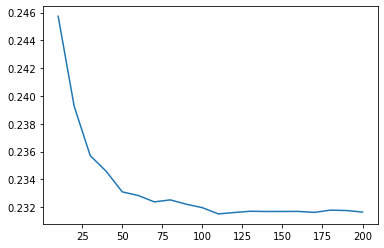

In [46]:
plt.plot(rf_scores.n_estimators, rf_scores.score)

I think it is `50` that the rmse score stops improving

### Question 4

In [51]:
scores = []

for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                   max_depth=d,
                                   random_state=1,
                                   n_jobs=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        score = np.sqrt(mean_squared_error(y_pred, y_val))
        scores.append((d, n, score))

In [63]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'n_estimators','rmse'])
df_scores.head()

,max_depth,n_estimators,rmse
0,10,10,0.255042
1,20,10,0.252784
2,30,10,0.251647
3,40,10,0.251062
4,50,10,0.250192


In [67]:
df_scores[df_scores.max_depth == 10]

,max_depth,n_estimators,rmse
0,10,10,0.255042
20,10,15,0.244790
40,10,20,0.246327
60,10,25,0.246069


In [77]:
colors = ['black', 'red', 'blue', 'green']
depths = [10, 15, 20, 25]
list(zip(colors, depths))

[('black', 10), ('red', 15), ('blue', 20), ('green', 25)]

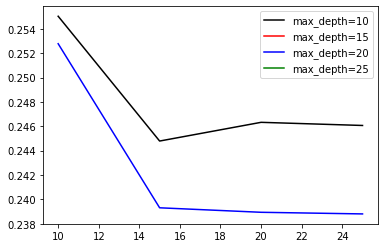

In [79]:

for o in zip(colors, depths):
    df_subset = df_scores[df_scores.max_depth == o[1]]
    plt.plot(df_subset.n_estimators, df_subset.rmse, color = o[0] , label='max_depth={}'.format(o[1]))
plt.legend()

seems it is `20`

### Question 5

In [80]:
 rf = RandomForestRegressor(n_estimators=10,
                                   max_depth=20,
                                   random_state=1,
                                   n_jobs=1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=1, random_state=1)

In [86]:
rf.feature_importances_

array([1.69573183e-02, 3.30938997e-02, 1.01333971e-01, 9.62649876e-02,
       3.62912907e-01, 3.00723750e-03, 3.10900842e-01, 3.56806263e-04,
       4.48661972e-04, 4.22762446e-03, 3.09180197e-02, 1.90412562e-02,
       2.05364687e-02])

In [88]:
max(rf.feature_importances_)

0.3629129067227312

In [99]:
len(dv.get_feature_names_out())

13

In [100]:
len(rf.feature_importances_)

13

<BarContainer object of 13 artists>

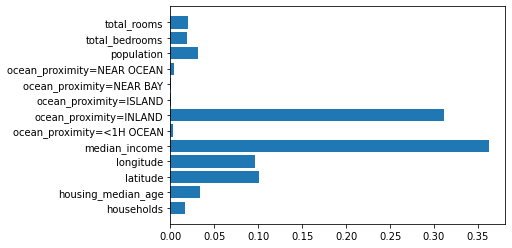

In [97]:
plt.barh(dv.get_feature_names_out(), rf.feature_importances_)

`Median Income` has the greates feature importance

In [105]:
features = dv.get_feature_names_out()
regex = re.compile(r"<", re.IGNORECASE)
features = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in features]
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [107]:
# create watch list
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [133]:
%%capture output
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, evals = watchlist, verbose_eval = 5, num_boost_round=100)

In [134]:
s = output.stdout

In [135]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [136]:
df_scores = parse_xgb_output(output)

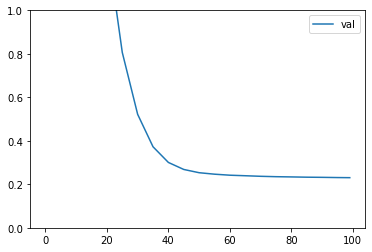

In [137]:
plt.plot(df_scores.num_iter, df_scores.val_rmse, label='val')
plt.ylim(0,1)
plt.legend()

In [138]:
# - 0.3 = 0.2260957847928297
# - 0.1 = 0.2305416021993131
y_pred = model.predict(dval)

In [139]:
np.sqrt(mean_squared_error(y_pred, y_val))

0.2305416021993131

In [ ]:
Hence, 0.3 is the best eta